In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import MySQLdb

In [62]:
import numpy as np

# Read Data From Database

In [4]:
mysql_cn= MySQLdb.connect(host='spider.c0kwpumescj5.us-east-1.rds.amazonaws.com', 
                port=3306,user='root', passwd='Zuoqian690712', 
                db='spider')
car_fax = pd.read_sql('select * from carfax;', con=mysql_cn) 

print 'loaded {} records from MySQL into dataframe:'.format(len(car_fax)) 
mysql_cn.close()

loaded 1062477 records from MySQL into dataframe:


In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
car_fax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062477 entries, 0 to 1062476
Data columns (total 29 columns):
dealer_id             1062477 non-null object
dealer_name           1062477 non-null object
dealer_city           1062477 non-null object
dealer_state          1062477 non-null object
car_vin               1062477 non-null object
car_year              1062477 non-null int64
car_make              1062477 non-null object
car_topOptions        1062477 non-null object
car_model             1062477 non-null object
car_trim              1062477 non-null object
car_mileage           1062477 non-null int64
car_list_price        1062477 non-null float64
car_current_price     1062477 non-null float64
car_exteriorColor     1062477 non-null object
car_interiorColor     1062477 non-null object
car_engine            1062477 non-null object
car_displacement      1062477 non-null object
car_drivetype         1062477 non-null object
car_transmission      1062477 non-null object
car_fuel     

In [6]:
car_fax.describe()

,car_year,car_mileage,car_list_price,car_current_price,car_mpgCity,car_mpgHighway,car_mpgCombined,car_oneOwner,car_noAccidents,car_serviceRecords,car_personalUse
count,"1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00"
mean,"2,012.90","56,441.57","20,187.67","20,191.42",19.26,26.17,21.78,0.61,0.81,0.90,0.67
std,4.01,"45,768.92","17,068.02","17,056.76",7.48,8.50,7.73,0.49,0.39,0.30,0.47
min,"1,981.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,011.00","23,944.00","10,995.00","10,996.00",16.00,22.00,18.00,0.00,1.00,1.00,0.00
50%,"2,014.00","42,385.00","17,598.00","17,597.00",19.00,26.00,21.00,1.00,1.00,1.00,1.00
75%,"2,016.00","79,886.00","26,950.00","26,938.00",23.00,31.00,26.00,1.00,1.00,1.00,1.00
max,"2,018.00","494,888.00","2,299,900.00","2,299,900.00",150.00,122.00,136.00,1.00,1.00,1.00,1.00


In [7]:
is_current_price = car_fax['car_list_price']!=0
is_car_mpgCity = car_fax['car_mpgCity']!=0
is_car_mpgHighway = car_fax['car_mpgHighway']!=0
is_car_mpgCombined = car_fax['car_mpgCombined']!=0

In [8]:
car_fax_clean = car_fax[is_current_price & is_car_mpgCity & is_car_mpgHighway &is_car_mpgCombined]

In [103]:
car_fax_clean['dealer_state'] = car_fax_clean['dealer_state'].apply(lambda x : x if x!='DC' else 'MD')

In [10]:
car_fax_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939336 entries, 69 to 1062476
Data columns (total 29 columns):
dealer_id             939336 non-null object
dealer_name           939336 non-null object
dealer_city           939336 non-null object
dealer_state          939336 non-null object
car_vin               939336 non-null object
car_year              939336 non-null int64
car_make              939336 non-null object
car_topOptions        939336 non-null object
car_model             939336 non-null object
car_trim              939336 non-null object
car_mileage           939336 non-null int64
car_list_price        939336 non-null float64
car_current_price     939336 non-null float64
car_exteriorColor     939336 non-null object
car_interiorColor     939336 non-null object
car_engine            939336 non-null object
car_displacement      939336 non-null object
car_drivetype         939336 non-null object
car_transmission      939336 non-null object
car_fuel              939336 non

In [11]:
car_fax_clean.head()

,dealer_id,dealer_name,dealer_city,dealer_state,car_vin,car_year,car_make,car_topOptions,car_model,car_trim,...,car_fuel,car_mpgCity,car_mpgHighway,car_mpgCombined,car_bodytype,car_oneOwner,car_noAccidents,car_serviceRecords,car_personalUse,crawl_time
69,TELH2I4001,Bradshaw Acura,Greenville,SC,19UDE2F30GA010968,2016,Acura,"Alloy Wheels,Keyless Entry,Cruise Control,Heat...",ILX,Unspecified,...,Gasoline,25,35,29,Sedan,1,1,1,1,2017-11-26 17:06:06
70,ZX1ZT8U001,Champion Chrysler Dodge Jeep,Indianapolis,IN,19UDE2F30GA011246,2016,Acura,"Leather Seats,Power Sun/Moonroof,Alloy Wheels,...",ILX,Unspecified,...,Gasoline,25,35,29,Sedan,1,1,1,1,2017-11-27 14:10:31
71,HZOJ5Z3001,AUTOSOURCE,Honolulu,HI,19UDE2F30GA021243,2016,Acura,,ILX,Unspecified,...,Gasoline,25,35,29,Sedan,0,1,1,1,2017-11-26 18:23:52
72,E4LL4YNR91,Acura North Scottsdale,Phoenix,AZ,19UDE2F30HA001625,2017,Acura,"Power Sun/Moonroof,Alloy Wheels,Keyless Entry,...",ILX,Unspecified,...,Gasoline,25,35,29,Sedan,0,1,0,0,2017-11-26 19:25:50
73,URPEJINF81,South Coast Acura,Costa Mesa,CA,19UDE2F30HA001642,2017,Acura,"Power Sun/Moonroof,Alloy Wheels,Keyless Entry,...",ILX,Unspecified,...,Gasoline,25,35,29,Sedan,1,1,1,0,2017-11-30 03:19:00


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import GridSearchCV

In [83]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [122]:
from sklearn.metrics import r2_score

In [71]:
le = LabelEncoder()

In [85]:
he = OneHotEncoder()

In [34]:
car_fax_clean['car_displacement'] = car_fax_clean['car_displacement'].apply(lambda x : float(x.replace('L','')))

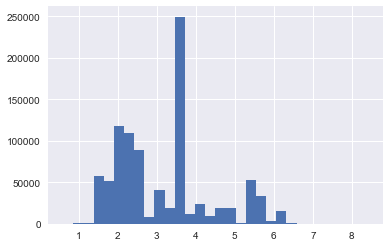

In [37]:
car_fax_clean['car_displacement'].hist(bins = 30)

In [39]:
car_fax_clean['car_displacement'].corr(car_fax_clean['car_current_price'])

0.31217665186458748

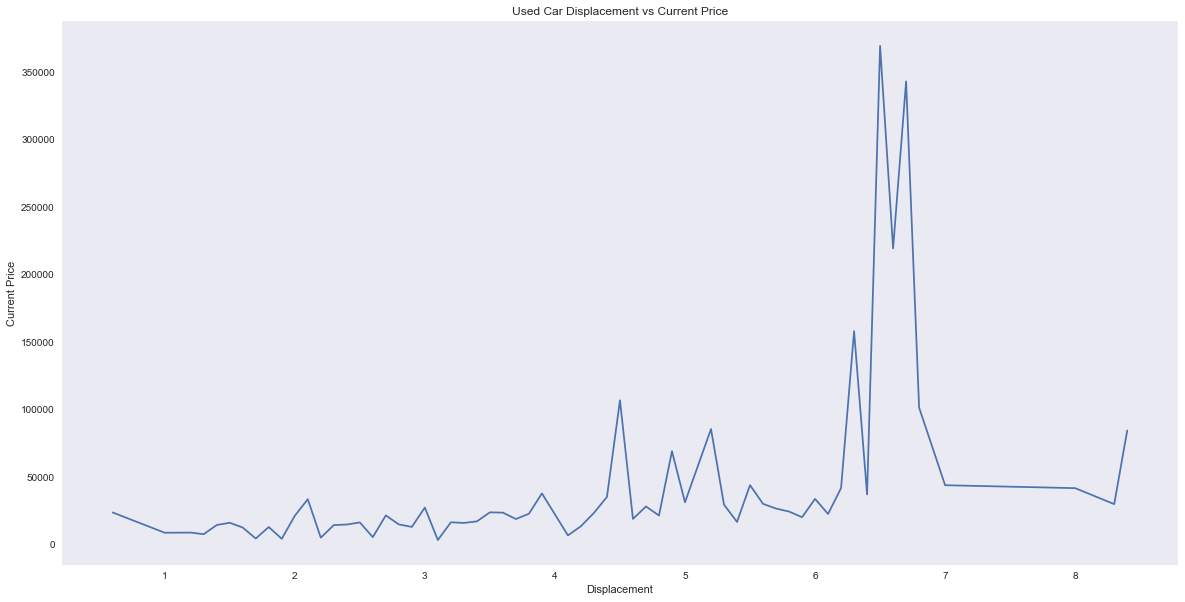

In [53]:
fig,ax = plt.subplots(figsize = (20,10))
ax.plot(car_fax_clean.groupby(by=['car_displacement'])['car_current_price'].mean())
ax.set_title('Used Car Displacement vs Current Price')
ax.set_xlabel('Displacement')
ax.set_ylabel('Current Price')
ax.grid(b = False)
plt.show()

In [110]:
X = car_fax_clean[['dealer_state', 'car_year', u'car_make', 'car_exteriorColor',
                   'car_interiorColor', 'car_model', 'car_mileage', 'car_engine',
                   'car_displacement', 'car_drivetype', 'car_transmission','car_fuel',
                  'car_mpgCombined', 'car_bodytype','car_oneOwner', 'car_noAccidents',
                   'car_serviceRecords', 'car_personalUse']]

In [111]:
y = car_fax_clean['car_current_price']

In [112]:
X_label_encoded = le.fit_transform(X[['dealer_state']])

In [113]:
X_label_encoded

array([39, 14, 10, ..., 30, 26,  6])

In [114]:
X_onehot_encoded = he.fit_transform(X_label_encoded.reshape(-1,1)).toarray()

In [119]:
X_encoded = pd.get_dummies(X)

In [120]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938079 entries, 69 to 1062476
Columns: 934 entries, car_year to car_bodytype_Wagon
dtypes: float64(1), int64(7), uint8(926)
memory usage: 932.8 MB


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

In [123]:
rf = RandomForestRegressor(n_jobs=-1, verbose =1)
parameters = {'n_estimators':np.arange(10,100,10),
              'max_features':['auto','sqrt', 'log2'],
              'min_samples_split': np.arange(2,15,1),
              'min_samples_leaf': np.arange(5,100,10),
              'oob_score':[True, False],
              'warm_start':[True, False]}

In [126]:
regression = GridSearchCV(estimator=rf,param_grid= parameters,verbose = 5)

In [ ]:
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
print r2_score(y_test, y_pred)

Fitting 3 folds for each of 14040 candidates, totalling 42120 fits
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished
/Users/shaowei/anaconda2/envs/ML_learning/lib/python2.7/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.862766, total= 3.3min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.6s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.890499, total= 3.1min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.6s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.888451, total= 3.2min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 10.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.6s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.856022, total= 3.2min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 13.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.6s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.884950, total= 3.1min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.6s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.883602, total= 3.0min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.860336, total= 2.9min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.890046, total= 3.0min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.3s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.893658, total= 2.8min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.4s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.865799, total= 2.7min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.5s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.891265, total= 2.8min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.3s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=10, min_samples_split=2, max_features=auto, score=0.874893, total= 2.8min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.0s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.861798, total= 5.6min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.8s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.888036, total= 5.6min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.7s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.884949, total= 5.6min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.7s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.862982, total= 5.7min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.6s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.892265, total= 5.8min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.7s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.888787, total= 5.7min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.6s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.864904, total= 5.2min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.6s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.890533, total= 5.2min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.7s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.888270, total= 5.3min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.9min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.7s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.866925, total= 5.1min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.6s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.889734, total= 5.3min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.0min finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.7s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=20, min_samples_split=2, max_features=auto, score=0.888482, total= 5.2min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.4min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.1s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.863292, total= 8.3min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.5min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.1s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.893239, total= 8.4min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.1s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.883930, total= 8.5min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.0s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.863918, total= 8.6min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.1s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.887451, total= 8.7min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.3s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.887528, total= 8.5min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.0s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.865813, total= 7.9min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.4min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.5s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.888749, total= 7.7min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.0s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.887562, total= 7.8min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.9s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.867231, total= 7.9min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.4s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.886891, total= 7.8min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    4.1s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=30, min_samples_split=2, max_features=auto, score=0.887554, total= 7.9min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.4s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.865522, total=11.2min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.5s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.893211, total=11.2min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.4s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.883872, total=11.1min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.3s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.866232, total=11.3min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.3s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.889796, total=11.2min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.4s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.885806, total=11.1min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.9min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.3s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.864713, total=10.2min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.4s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.895887, total=10.5min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.5s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.884311, total=10.4min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.0s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.863155, total=10.4min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.2min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.7s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.890022, total=10.4min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    5.3s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=40, min_samples_split=2, max_features=auto, score=0.884762, total=10.4min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.863827, total=14.0min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.8s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.890863, total=14.1min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.889680, total=13.9min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.865052, total=14.0min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.890475, total=14.0min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.885233, total=13.9min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.8s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.865612, total=12.9min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.1s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.889790, total=13.0min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.4s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.888641, total=13.0min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.6s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.864191, total=12.9min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.0s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.890441, total=13.0min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.8s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=50, min_samples_split=2, max_features=auto, score=0.885492, total=13.0min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.3s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.864645, total=16.7min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.0s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.888853, total=16.7min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.0s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.888995, total=16.6min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.2s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.867166, total=16.8min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.1s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.889449, total=16.8min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.1s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.886221, total=16.7min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.2s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.863796, total=15.4min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.2s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.889744, total=15.6min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.1s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.891909, total=15.4min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.4s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.864250, total=15.6min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.2s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.889794, total=15.6min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 19.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    9.2s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=60, min_samples_split=2, max_features=auto, score=0.886106, total=20.3min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 24.4min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    6.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   12.6s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.865429, total=27.4min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 20.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   14.0s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.892356, total=23.4min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 23.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    6.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   10.9s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.886674, total=25.0min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 20.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    9.5s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.864810, total=22.7min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 18.7min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   10.3s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.889631, total=20.8min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 19.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   11.2s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.887831, total=21.3min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 19.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   10.8s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.866767, total=20.0min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 22.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    6.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   10.5s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.890570, total=23.4min
[CV] warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 22.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    6.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   12.0s finished


[CV]  warm_start=True, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.886879, total=22.7min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 20.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:   10.7s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.866610, total=21.2min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 18.1min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    5.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    9.6s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.891929, total=18.4min
[CV] warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 18.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    4.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    9.4s finished


[CV]  warm_start=False, oob_score=False, min_samples_leaf=5, n_estimators=70, min_samples_split=2, max_features=auto, score=0.885780, total=18.4min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 20.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   10.9s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto, score=0.864703, total=22.5min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 23.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   16.5s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto, score=0.890158, total=26.3min
[CV] warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 24.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    6.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   18.0s finished


[CV]  warm_start=True, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto, score=0.885560, total=26.4min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 24.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    5.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   11.7s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto, score=0.864893, total=27.2min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto 


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 23.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   13.4s finished


[CV]  warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto, score=0.890774, total=25.9min
[CV] warm_start=False, oob_score=True, min_samples_leaf=5, n_estimators=80, min_samples_split=2, max_features=auto 
